- **Purpose:** Constructing weighted gene coexpression network following the tutorials for PyWGCNA package (a python implementation of WGCNA R package)
- **Date:** August 09, 2025

# 1. Packages and data

In [1]:
# Import the packages
import PyWGCNA as pcn
import pandas as pd
import numpy as np

In [2]:
# Print package versions
print(f"pandas=={pd.__version__}")
print(f"numpy=={np.__version__}")

pandas==2.3.1
numpy==2.2.6


In [3]:
# PyWGCNA version
!pip show PyWGCNA

Name: PyWGCNA
Version: 2.2.1
Summary: PyWGCNA is a Python package designed to do Weighted correlation network analysis (WGCNA)
Home-page: https://github.com/mortazavilab/PyWGCNA
Author: Narges Rezaie
Author-email: nargesrezaie80@gmail.com
License: MIT
Location: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/software/miniforge3/envs/wgcna/lib/python3.10/site-packages
Requires: anndata, biomart, gseapy, matplotlib, networkx, numpy, pandas, psutil, pyvis, reactome2py, requests, rsrc, scikit-learn, scipy, seaborn, setuptools, statsmodels
Required-by: 


In [4]:
# Read data
data_dir = "./5xFAD_paper/"
gene_exp = pd.read_csv(data_dir + "expressionList.csv", index_col=0)
metadata = pd.read_csv(data_dir + "sampleInfo.csv", index_col=0)

In [5]:
# Gene expression data
gene_exp.head()

,ENSMUSG00000000003,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000118383,ENSMUSG00000118384,ENSMUSG00000118385,ENSMUSG00000118386,ENSMUSG00000118387,ENSMUSG00000118388,ENSMUSG00000118389,ENSMUSG00000118390,ENSMUSG00000118391,ENSMUSG00000118392
sample_id,,,,,,,,,,,,,,,,,,,,,
X4mo_cortex_F_5xFADHEMI_430,0.0,1.90,0.00,0.13,0.43,22.37,24.24,19.32,33.41,620.45,...,0.75,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.04,0.0
X4mo_cortex_F_5xFADHEMI_431,0.0,1.10,0.06,0.07,0.18,16.99,24.69,23.88,31.40,705.73,...,0.67,0.0,0.55,0.43,0.0,0.0,0.0,0.0,0.00,0.0
X4mo_cortex_F_5xFADHEMI_433,0.0,1.18,0.07,0.13,1.90,20.37,28.06,21.33,32.14,699.50,...,0.91,0.0,0.00,0.19,0.0,0.0,0.0,0.0,0.02,0.0
X4mo_cortex_F_5xFADHEMI_434,0.0,2.18,0.00,0.07,0.31,17.98,21.46,15.06,27.60,639.95,...,0.11,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
X4mo_cortex_F_5xFADHEMI_511,0.0,1.50,0.10,0.14,0.53,18.35,20.18,18.66,26.43,640.55,...,0.64,0.0,1.38,0.00,0.0,0.0,0.0,0.0,0.02,0.0


In [6]:
# Metadata
metadata.head()

,Age,Tissue,Sex,Genotype
sample_id,,,,
X4mo_cortex_F_5xFADHEMI_430,4mon,Cortex,Female,5xFADHEMI
X4mo_cortex_F_5xFADHEMI_431,4mon,Cortex,Female,5xFADHEMI
X4mo_cortex_F_5xFADHEMI_433,4mon,Cortex,Female,5xFADHEMI
X4mo_cortex_F_5xFADHEMI_434,4mon,Cortex,Female,5xFADHEMI
X4mo_cortex_F_5xFADHEMI_511,4mon,Cortex,Female,5xFADHEMI


# 2. Preprocessing

In [7]:
# WGCNA object 
pyWGCNA_5xFAD = pcn.WGCNA(name="5xFAD",
                          species="mus musculus",
                          geneExp=gene_exp,
                         sampleInfo=metadata)
pyWGCNA_5xFAD

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



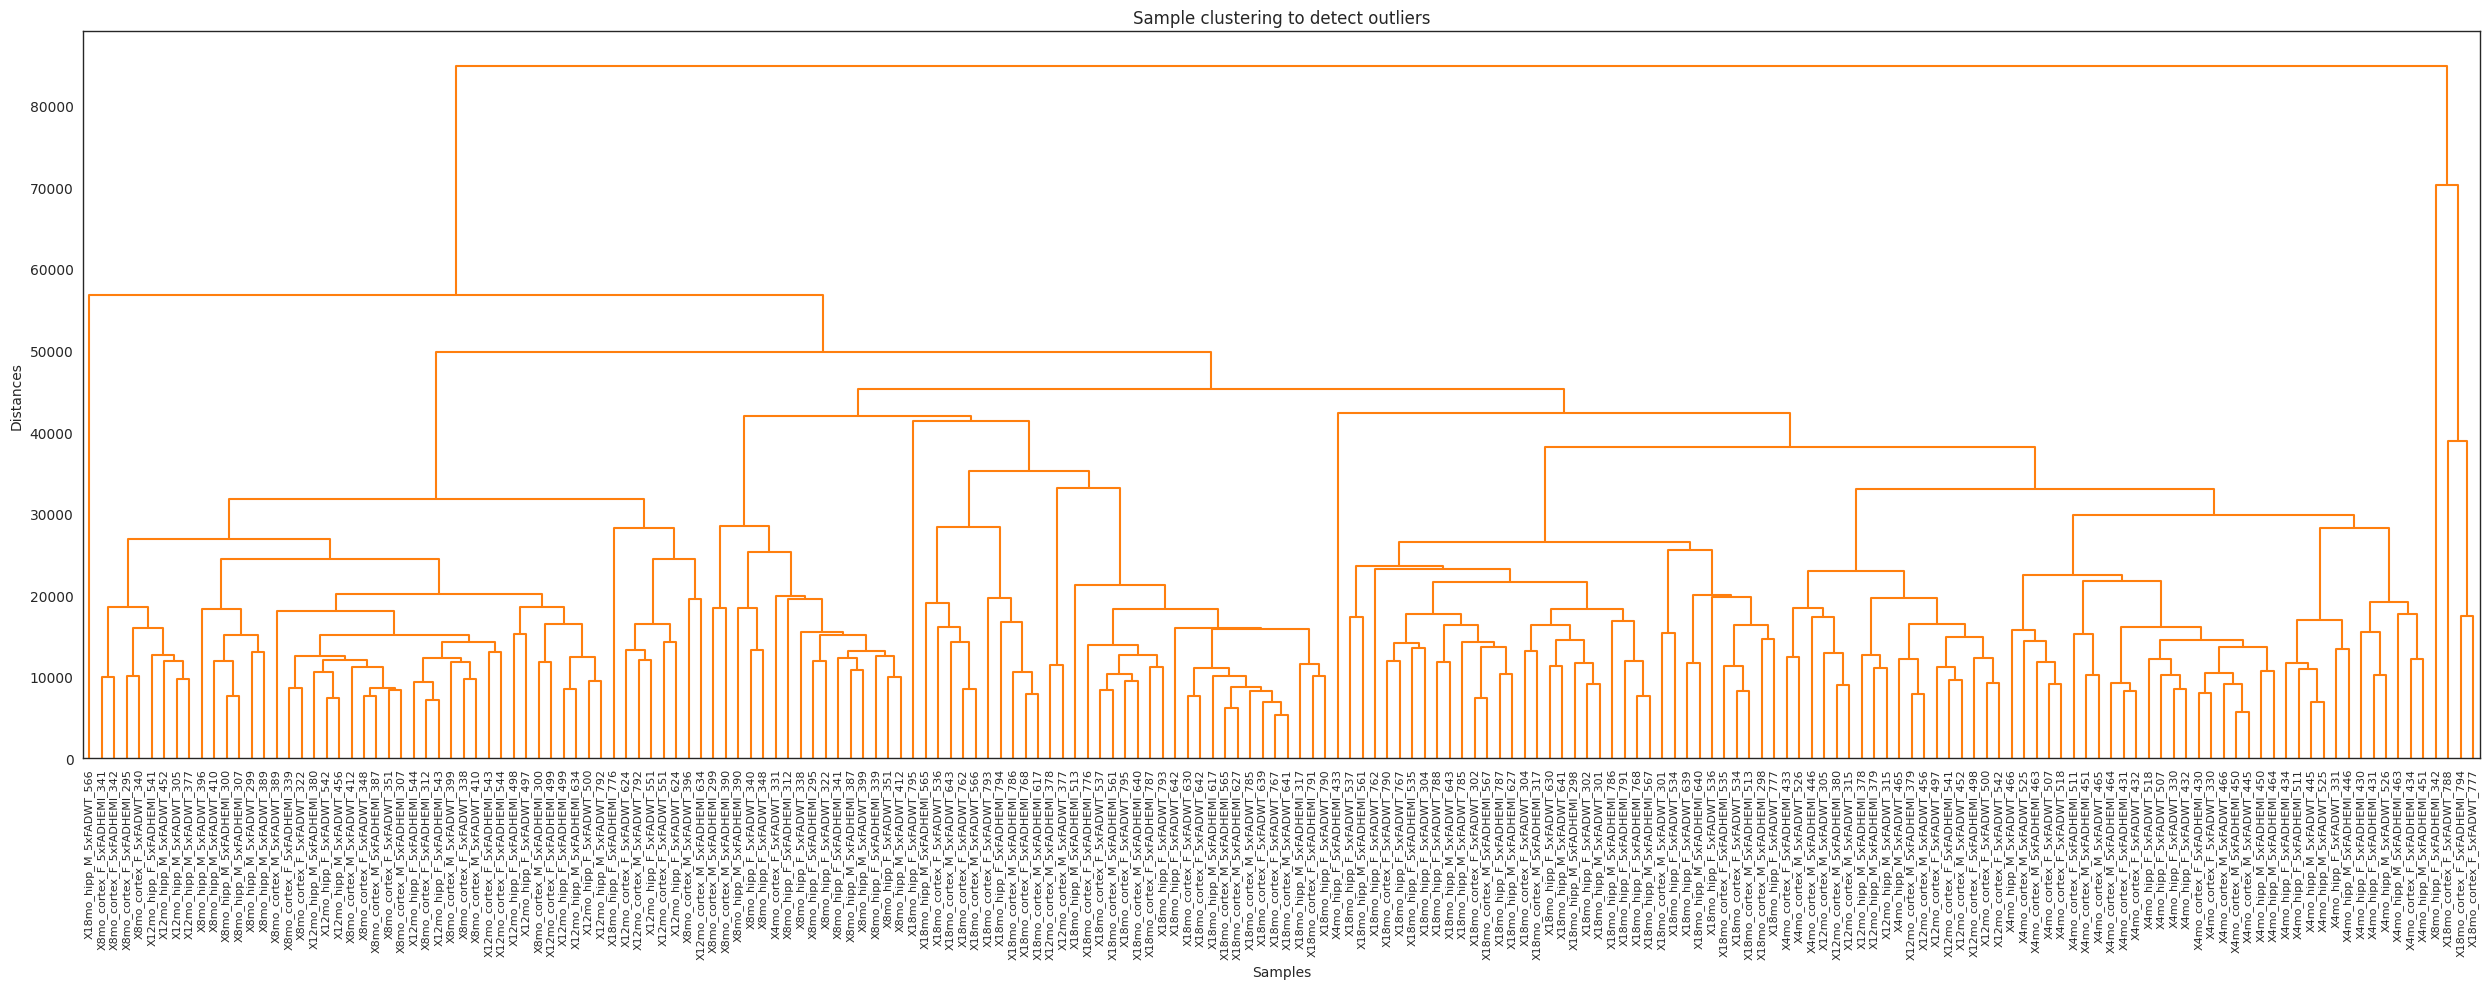

In [8]:
# Preprocessing
pyWGCNA_5xFAD.preprocess()

# 3. Finding modules

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1876
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.368857 -0.481613       0.701585  2444.750756  2260.416614   
1       2    0.7253  -0.99165       0.886361   840.665489   673.081241   
2       3  0.791986 -1.194264       0.946969   385.685335   258.451265   
3       4  0.835392   -1.3419       0.968446   207.404152   113.456087   
4       5  0.853842 -1.472183       0.973346   123.232581    54.784481   
5       6  0.870673 -1.553348       0.979584    78.455923     28.47124   
6       7  0.886736 -1.600869       0.986635    52.572016    15.594822   
7       8  0.896672 -1.639343       0.992373     36.65884     9.454046   
8       9  0.903531 -1.677747       0.994643    26.397061     6.024431   
9      10  0.906045 -1.706474       0.995895    19.521431     3.975959   
10     11  0.905582 -1.731076       0.994806    14.767291     2.623921   
11     13

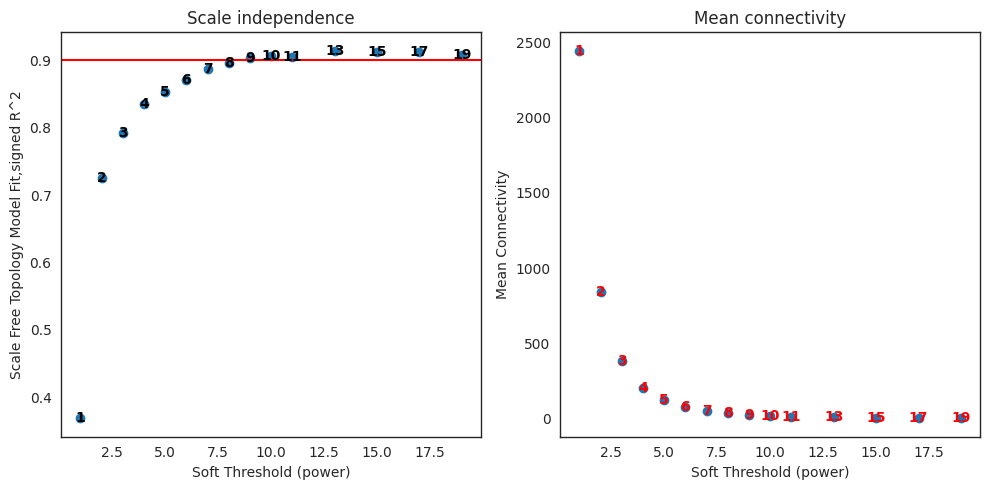

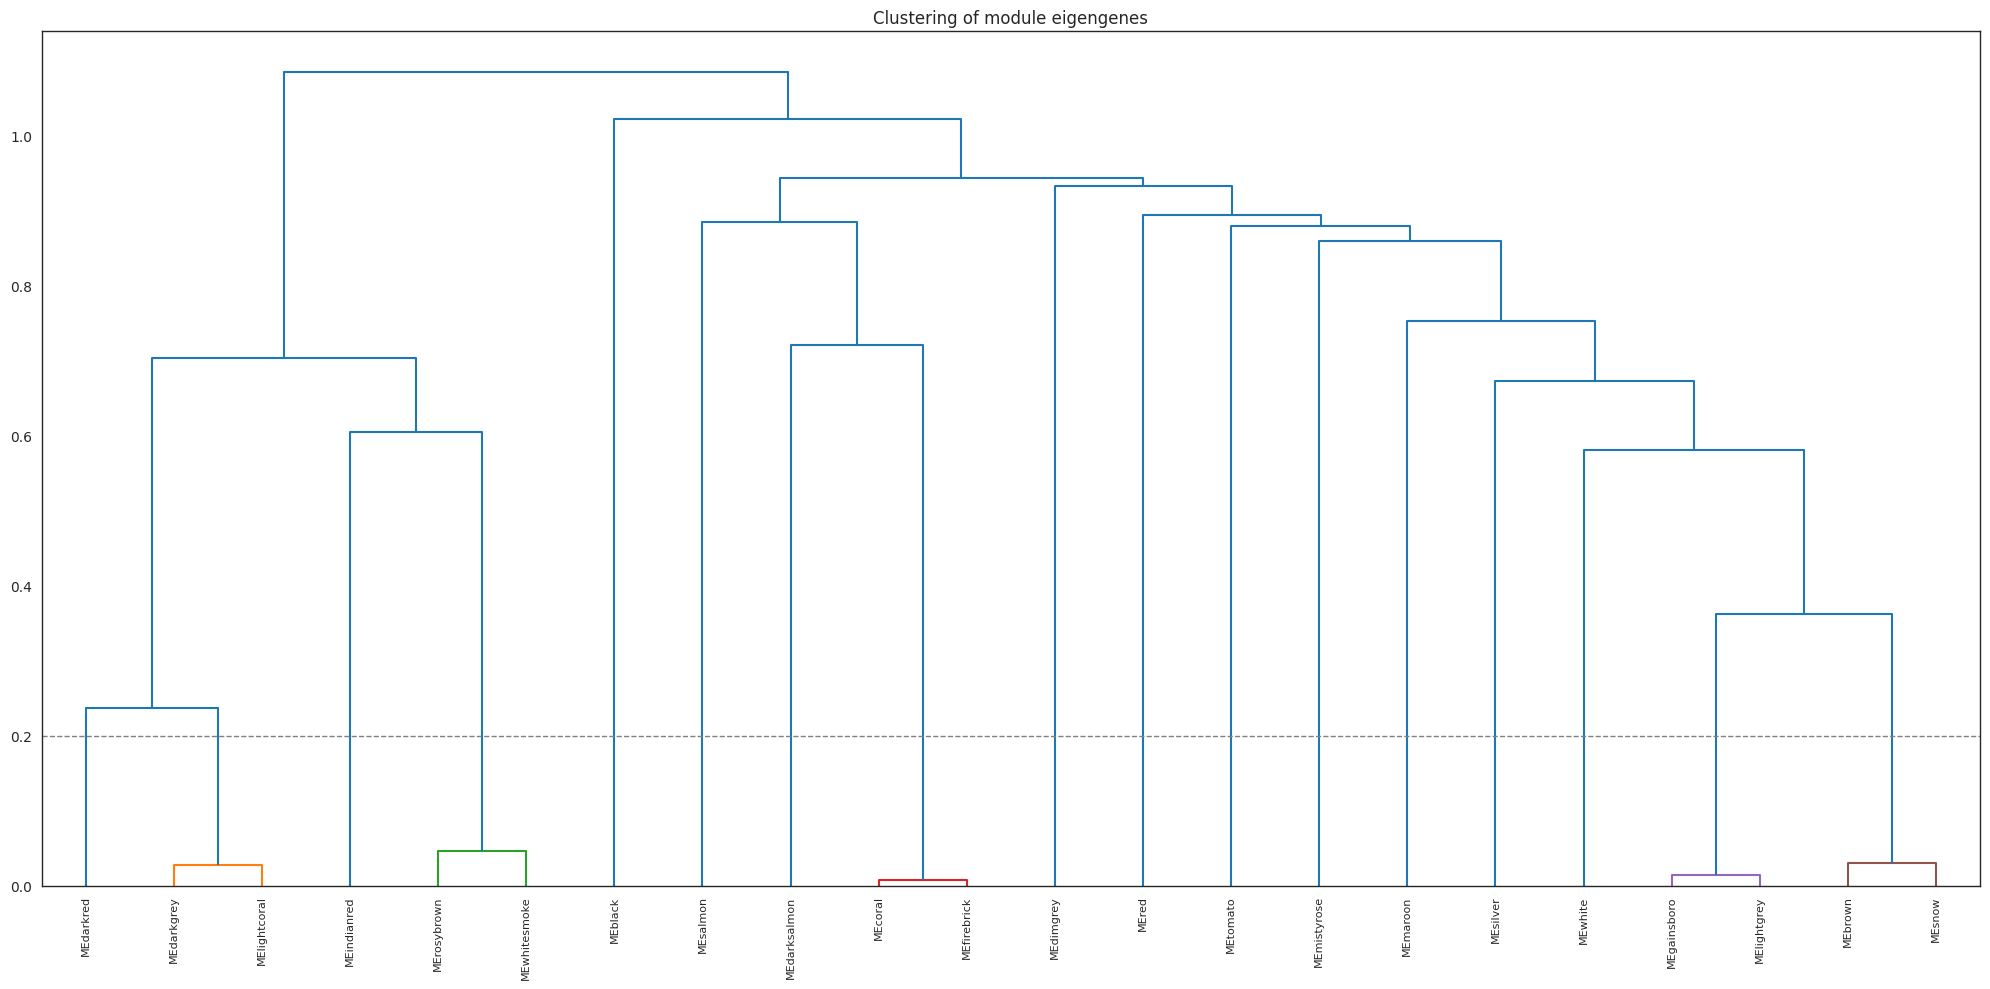

In [9]:
# Finding modules
pyWGCNA_5xFAD.findModules()

In [10]:
# add color for metadata
pyWGCNA_5xFAD.setMetadataColor('Sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_5xFAD.setMetadataColor('Genotype', {'5xFADWT': 'darkviolet',
                                            '5xFADHEMI': 'deeppink'})
pyWGCNA_5xFAD.setMetadataColor('Age', {'4mon': 'thistle',
                                       '8mon': 'plum',
                                       '12mon': 'violet',
                                       '18mon': 'purple'})
pyWGCNA_5xFAD.setMetadataColor('Tissue', {'Hippocampus': 'red',
                                          'Cortex': 'blue'})

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..



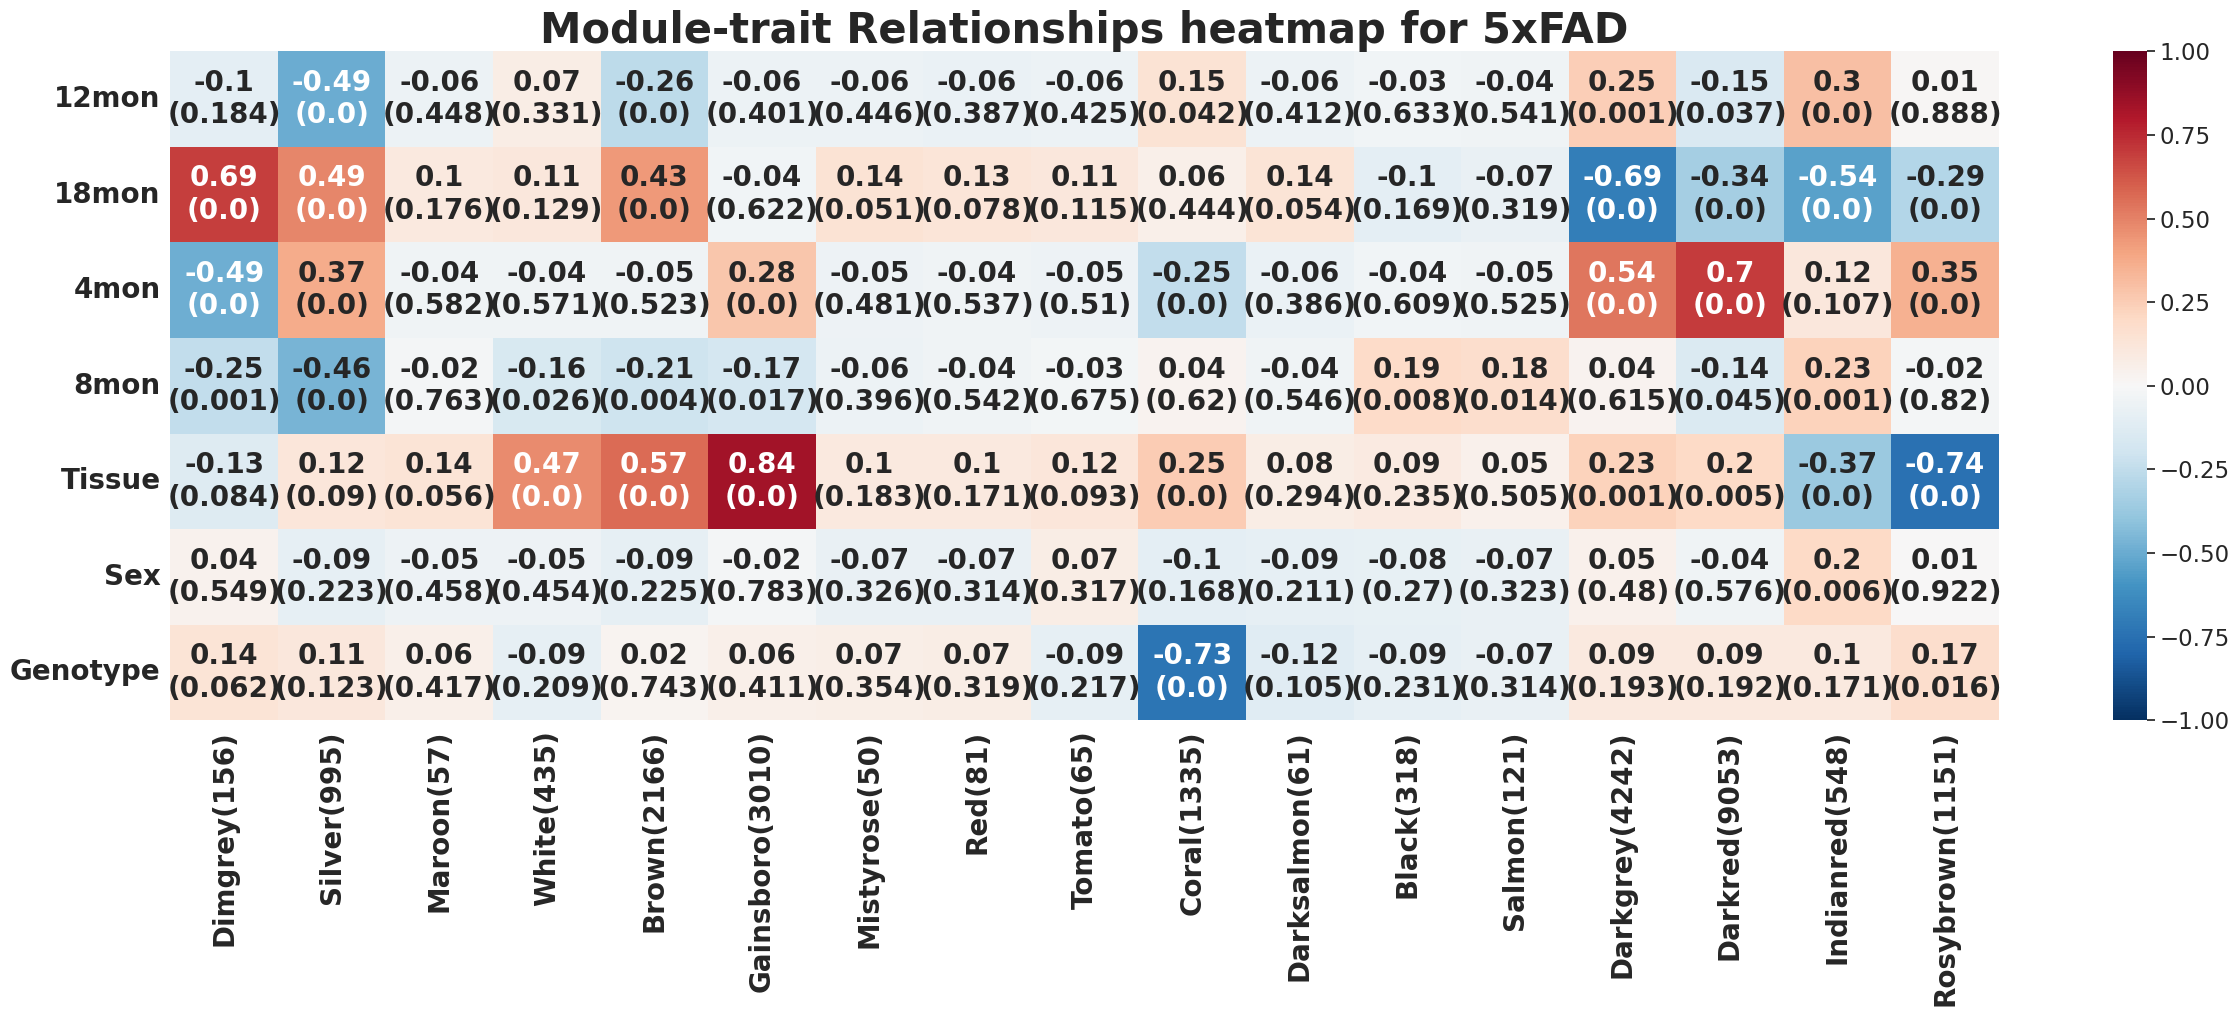

In [13]:
# Quantifying relationship with traits
pyWGCNA_5xFAD.analyseWGCNA()

In [14]:
# Finding module gene for coral
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="coral", n=10)

calculating adjacency matrix ...
	Done..



,connectivity,dynamicColors,moduleColors,moduleLabels
ENSMUSG00000036905,142.377574,coral,coral,2
ENSMUSG00000038642,138.650424,coral,coral,2
ENSMUSG00000021665,135.848008,coral,coral,2
ENSMUSG00000036896,134.358788,coral,coral,2
ENSMUSG00000000290,134.030810,coral,coral,2
ENSMUSG00000058715,132.936332,coral,coral,2
ENSMUSG00000030124,131.812832,coral,coral,2
ENSMUSG00000064267,130.008128,coral,coral,2
ENSMUSG00000021423,129.823495,coral,coral,2
ENSMUSG00000030798,128.650320,coral,coral,2


In [15]:
# Finding module gene for gainsboro
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="gainsboro", n=10)

calculating adjacency matrix ...
	Done..



,connectivity,dynamicColors,moduleColors,moduleLabels
ENSMUSG00000024065,142.262596,gainsboro,gainsboro,7
ENSMUSG00000078816,141.407665,gainsboro,gainsboro,7
ENSMUSG00000022861,138.881572,gainsboro,gainsboro,7
ENSMUSG00000031078,137.928467,gainsboro,gainsboro,7
ENSMUSG00000021892,137.865983,gainsboro,gainsboro,7
ENSMUSG00000060780,132.900987,gainsboro,gainsboro,7
ENSMUSG00000022212,131.161768,gainsboro,gainsboro,7
ENSMUSG00000032356,129.900760,gainsboro,gainsboro,7
ENSMUSG00000020656,129.105138,gainsboro,gainsboro,7
ENSMUSG00000024935,126.623520,gainsboro,gainsboro,7
